Project:Clustering
Marwen Zrida

# Introduction
Clustering is one of the most famous unsupervised machine learning techniques. It aims to condense "similar" datapoints together in order to identify patterns and groups within datasets.Clustering could be implmented using several algorithms that perform differently given data complexity and features.
In this project we will attempt to identify patterns and group similar datapoints together for 2 datasets: the iris dataset and the mnist dataset. We will be using the kmeans++ algorithm, density based clustering algorithm and aglomerative clustering.
In the next section: Methodology, we will explain in details how the 3 clustering algorithm work and we will talk about the different tasks that will be accomplished for this project

# Methodology
## Datasets
clustering will be implemented for 2 datasets:
The iris dataset: 150 data samples recording 4 different features of iris. The dataset has 3 different labels: one for each type of iris
The mnist dataset: this dataset records 1797 hand writing samples. The images have 64 pixles (features) and are classified in 10 seperate categories (0 through 9)

## Clustering algorithms
For the iris dataset, we will attempt to group the different types of flowers together using 3 different clustering algoriths:
### Kmeans+ algorithm
The Kmeans algorithm aims to group similar datapoints together in k predetermined clusters which is one of the disadvantages of using this technique. Kmeans works as follows:
first, it randomly picks k centroids from the sample points as initial cluster centers
We then assign each sample to the nearest cluster centers.
Next, we move the centroids to the center of the samples that were assigned to it.
We keep reassigning datapoints to each cluster and moving the centroids untl assignements do not change or we reach the maximimum number of iterations or meet a predetermined tolerance.

the Kmeans algorithm aims to minimize the cluster inirita. It assigns points to the different clusters by minimizig the
distance between each data sample and the centers

shortcomings of Kmeans++: We have to determine the number of K centers. This means that we need to have an idea about the date we are trying to cluseter to be able to effectively group similar data together. We will see in this porject how this issue could be tackled throught the use of the elbow technique.
Kmeans++ also does not perform well whrn the data is not nicely linearly seperable which makes it significantly lesseffective on complex data.

### Density based clustering algorithm
This main advantage of this algorithm is that the number of clusters does not need to be determined in advance:
This algorithm is also able to detect outliers and classify them as outliers which may improve the performance of the algorithm.
DBSCAN works as follows:
The algorithm splits the datapoints into core points, border points and noise:
core points are points who have a predetermined number of neighbors laying within a radius epsilon
border points are data points who do not have enough neighbors withing the specified radius but are neighbors to other core points
noise is any point which doesnt verify any of the above conditions

The main disadvantage of this clustering technique is that we need to identify the optimal number of neighbors and the radius epsilon to be able to capture the different groups in our dataset. We also must be careful about noise that might lead to loss of information

### Aglomerative clustering
This algorithm starts by identifying each datapoint as its own cluster. It then proceeds with grouping the most similar clusters together (based on distance: does not have to be euclidean distance)
Grouping clusters together continues until we reach the number of desired/predetermined clusters.
Agglomerative clustering's main disadavantage is that we have to determine the number of clusters in advance, we also have to tweek the hyperparameter until we get an optimal performance: distance and linkage type.

### Implementing the same algorithms for the Mnist dataset
We will attempt to group the images in the mnist dataset given the digit they represent(0 through 9). We will not apply DBSCAN on this dataset given the sparse information we have (a lot of noise for relatively high epsilon values)

## Evaluating the performance of our algorithms
We will attempt to graph our scatters whenever id possible (we will perform a PCA on the iris dataset to be able to see the result of our clustering techniques)
We will also plot the silhouette graphs which will give us an idea about how similar are points within the same cluster and how dissimilar are points belonging to different clusters
More will be said abou silhouette during this project.

## Checking true labels to see how well each clustering technique was

Even if clustering is not a supervised technique, it is intersting to see if our clustering correctly captured the different classes in our data.
We will write a code that uses the true labels to check the accuracy score of each of our clustering techniques


# Code Implementation

## Loading and preprocessing data
We first load the iris and mnist data, we normilize the datasets to improve clustering performance and we implement a PCA to reduce the dimensions of our iris dataset to be able to nicely graph our clusters without dramatically impacting the classiffication performance

In [336]:
#Import Datasets
from sklearn import datasets 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

X_mn = digits.data
y_mn = digits.target
#print(np.bincount(y_mn))


#print(X_mn.shape,y_mn.shape)
iris = datasets.load_iris()
X_ir = iris.data
y_ir = iris.target
sc_ir=StandardScaler()
sc_mn=StandardScaler()
X_ir=sc_ir.fit_transform(X_ir)
X_mn=sc_mn.fit_transform(X_mn)
#apply PCA for both datasets
pc1=PCA(n_components=2,random_state=0)
X_ir=pc1.fit_transform(X_ir)

print("iris and mnist data sets imported and preprocessed")


iris and mnist data sets imported and preprocessed


# Kmeans++: identifying the optimal number of k clusters

in this section we vary the number of clusters k and run multiple kmeans classifiers to identify the optimal number of clusters we should use
To make this decision we use the elbow trick: we plot the inirtia value for each of our classifiers and identify where the elbow is (inirtia does not improve that much anymore)
Note that kmeans seeks to minimize inirtia and therefore it is important to consider inirtia while making a decision about the number of clusters
## Results:
we can see below that k=3 is a good choice for the irid data
the results for the mnist data seems inconclusive (no elbow), However we pick k=10 for the rest of the project to be consistent with the actual data

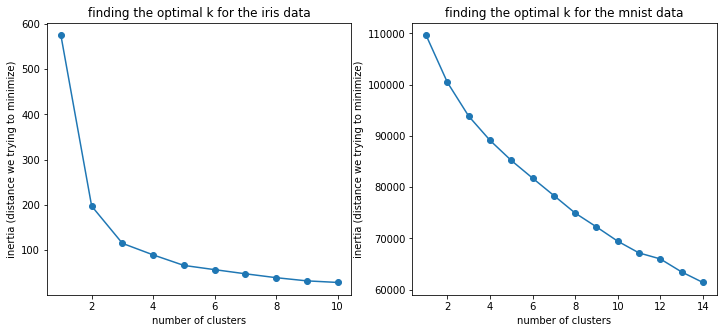

In [119]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#we are using kmean++ first, on both datasets
#we try to find optimal number of clusters using the elbow trick
#we will apply PCA for iris for visualization purposes


#fit kmeans++ to find elbow for iris
inertias_=[]
for k in np.arange(1,11):
    clf=KMeans(n_clusters=k,random_state=0)
    clf.fit(X_ir)
    inertias_.append(clf.inertia_)

x_axis=np.arange(1,11)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(x_axis,inertias_,marker='o')
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('inertia (distance we trying to minimize)')
ax1.set_title('finding the optimal k for the iris data')

#fit kmeans++ to find elbow for mnist
inertias_=[]
for k in np.arange(1,15):
    clf=KMeans(n_clusters=k,random_state=0,max_iter=300, tol=1e-4)
    clf.fit(X_mn)
    inertias_.append(clf.inertia_)

x_axis=np.arange(1,15)
ax2.plot(x_axis,inertias_,marker='o')
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('inertia (distance we trying to minimize)')
ax2.set_title('finding the optimal k for the mnist data')
plt.show()

#looks like k=3 is the optimal number of clusters (elbow trick)
#inconclusive for mnist data


# Fitting and plotting Kmean++ for the iris data
We next fit and predict a Kmean++ classifier for the iris data.
Since our data is now 2 dimensional, we can plot the graph and show how our classifier was able to split our data into 3 different cluster. We also plot the true data just to visually compare the differences and assess the performance

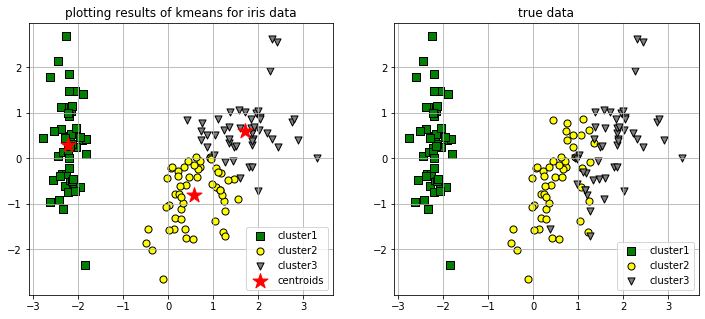

In [317]:
#running the kmeans++ for our data (we can do it since its 2d)
km_ir=KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=0,tol=1e-4,init='k-means++')
y_kmir=km_ir.fit_predict(X_ir)
#plotting the results of our k-means algorithm
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(X_ir[y_kmir==0,0],X_ir[y_kmir==0,1],s=50,c='green',edgecolors='black',marker='s',label='cluster1')
ax1.scatter(X_ir[y_kmir==1,0],X_ir[y_kmir==1,1],s=50,c='yellow',edgecolors='black',marker='o',label='cluster2')
ax1.scatter(X_ir[y_kmir==2,0],X_ir[y_kmir==2,1],s=50,c='grey',edgecolors='black',marker='v',label='cluster3')
ax1.scatter(km_ir.cluster_centers_[:,0],km_ir.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
ax1.grid()
ax1.set_title('plotting results of kmeans for iris data')
ax1.legend(loc='best')

ax2.scatter(X_ir[y_ir==0,0],X_ir[y_ir==0,1],s=50,c='green',edgecolors='black',marker='s',label='cluster1')
ax2.scatter(X_ir[y_ir==1,0],X_ir[y_ir==1,1],s=50,c='yellow',edgecolors='black',marker='o',label='cluster2')
ax2.scatter(X_ir[y_ir==2,0],X_ir[y_ir==2,1],s=50,c='grey',edgecolors='black',marker='v',label='cluster3')
#plt.scatter(km_ir.cluster_centers_[:,0],km_ir.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
ax2.grid()
ax2.set_title('true data')
ax2.legend(loc='best')
plt.show()

# Fitting kmeans for mnist and plotting the silhouette plots for both iris and mnist
The code below fits a kmeans++ classifier for the mnist data, it then proceeds with plotting the silhouette scores which are very helpful in assessing the overall performance of our classifier. The silhouette scores measures how similar same cluster datapoints are, it also measures how dissimlar different clusters are. The scores are computed for each datapoint seperately, and we sort them in a descending order for a better visualaztion
Silhouette score fall within the range -1,1. The higher the silhouette score, the better job our classifier is doing at classifiying a given datapoint

## Results:
We can see that the average silhouette score for th iris data is 0.51
However, the silhouette score is dramatically lower for the mnist data: avg= 0.144
Which suggests that kmeans++ performed a lot better on the iris dataset

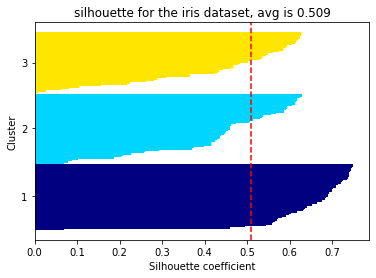

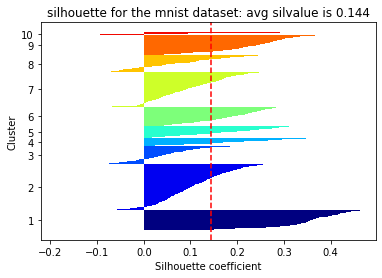

In [132]:
#silhouette for both datasets
from matplotlib import cm
from sklearn.metrics import silhouette_samples

#iris data

cluster_labels=np.unique(y_kmir)
n_cluster=cluster_labels.shape[0]
sil_vals=silhouette_samples(X_ir,y_kmir,metric='euclidean')
y_ax_lower,y_ax_upper= 0, 0
yticks=[]
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
for i,c in enumerate(cluster_labels):
    sil_v=sil_vals[y_kmir==c]
    sil_v.sort()
    y_ax_upper+=len(sil_v)
    color=cm.jet(float(i)/n_cluster)
    plt.barh(range(y_ax_lower,y_ax_upper),sil_v,height=1.0,color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(sil_v)

sil_average=np.mean(sil_vals)
plt.axvline(sil_average,ymin=0,ymax=y_ax_upper,color='red',linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('silhouette for the iris dataset, avg is %.3f' % sil_average)
plt.show()


#mnist data

km_mn=KMeans(n_clusters=10,init='k-means++',n_init=10,max_iter=300, tol=1e-4,random_state=0)
y_kmn=km_mn.fit_predict(X_mn)

cluster_labels=np.unique(y_kmn)
n_cluster=cluster_labels.shape[0]
sil_vals=silhouette_samples(X_mn,y_kmn,metric='euclidean')
y_ax_lower,y_ax_upper= 0, 0
yticks=[]
for i,c in enumerate(cluster_labels):
    sil_v=sil_vals[y_kmn==c]
    sil_v.sort()
    y_ax_upper+=len(sil_v)
    color=cm.jet(float(i)/n_cluster)
    plt.barh(range(y_ax_lower,y_ax_upper),sil_v,height=1.0,color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(sil_v)

sil_average=np.mean(sil_vals)
plt.axvline(sil_average,ymin=0,ymax=y_ax_upper,color='red',linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('silhouette for the mnist dataset: avg silvalue is %.3f' % sil_average)
plt.show()

# DBSCAN
in this section we perform density based clustering on the iris dataset.
We can see from the graph below that our classifier was not able to split our data into 3 different classes, which suggests that our classifier has done a poor job clustering the iris data

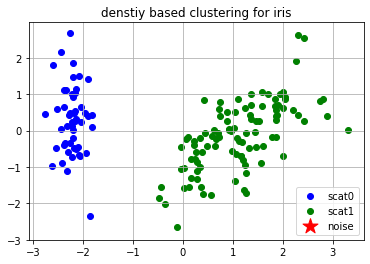

[ 50 100]


In [327]:
#try density based algorithm
from sklearn.cluster import DBSCAN
db=DBSCAN(min_samples=5,eps=1.5)
y_db=db.fit_predict(X_ir)
plt.scatter(X_ir[db.labels_==0][:,0],X_ir[db.labels_==0][:,1],c='blue',label='scat0')
plt.scatter(X_ir[db.labels_==1][:,0],X_ir[db.labels_==1][:,1],c='green',label='scat1')
plt.scatter(X_ir[db.labels_==-1][:,0],X_ir[db.labels_==-1][:,1],c='red',marker='*',s=250,label='noise')
plt.legend(loc='best')
plt.title('denstiy based clustering for iris')
plt.grid()
plt.show()


    

# Agglomerative clustering
In this section, we fit an agglomerative clustering classifier for both the iris and the mnist data
in a first step, we plot the classified data for iris and compare it to true data
We then plot the silhouette scores for both the iris and mnist data:
As we can see, we do not observe a significant difference in the performance of our classifier for the iris data
We do observe a higher average for the mnist data, but it seems that our classifier was not able to classify the digits 3 through 9 correctly (very low bincount)
We will see how this affects the accuracy of our classifiers in the next section

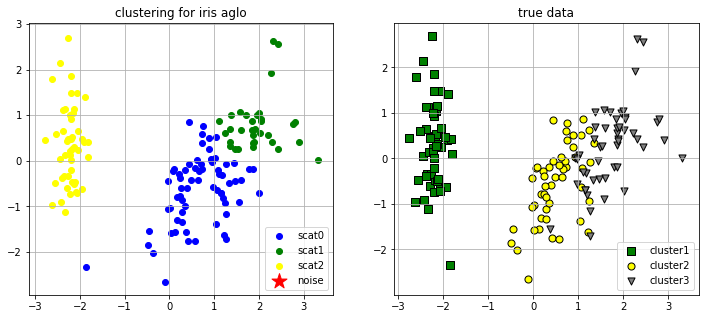

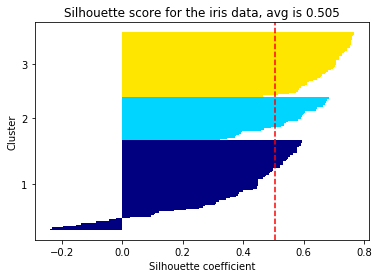

In [318]:
from sklearn.cluster import AgglomerativeClustering

algo_ir=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='complete')
y_agl_ir=algo_ir.fit_predict(X_ir)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(X_ir[y_agl_ir==0][:,0],X_ir[y_agl_ir==0][:,1],c='blue',label='scat0')
ax1.scatter(X_ir[y_agl_ir==1][:,0],X_ir[y_agl_ir==1][:,1],c='green',label='scat1')
ax1.scatter(X_ir[y_agl_ir==2][:,0],X_ir[y_agl_ir==2][:,1],c='yellow',label='scat2')
ax1.scatter(X_ir[y_agl_ir==-1][:,0],X_ir[y_agl_ir==-1][:,1],c='red',marker='*',s=250,label='noise')
ax1.legend(loc='best')
ax1.set_title('clustering for iris aglo')
ax1.grid()



ax2.scatter(X_ir[y_ir==0,0],X_ir[y_ir==0,1],s=50,c='green',edgecolors='black',marker='s',label='cluster1')
ax2.scatter(X_ir[y_ir==1,0],X_ir[y_ir==1,1],s=50,c='yellow',edgecolors='black',marker='o',label='cluster2')
ax2.scatter(X_ir[y_ir==2,0],X_ir[y_ir==2,1],s=50,c='grey',edgecolors='black',marker='v',label='cluster3')
#plt.scatter(km_ir.cluster_centers_[:,0],km_ir.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
ax2.grid()
ax2.set_title('true data')
ax2.legend(loc='best')
plt.show()

#silhouette for dis aglo

cluster_labels=np.unique(y_agl_ir)
n_cluster=cluster_labels.shape[0]
sil_vals=silhouette_samples(X_ir,y_agl_ir,metric='euclidean')
y_ax_lower,y_ax_upper= 0, 0
yticks=[]
for i,c in enumerate(cluster_labels):
    sil_v=sil_vals[y_agl_ir==c]
    sil_v.sort()
    y_ax_upper+=len(sil_v)
    color=cm.jet(float(i)/n_cluster)
    plt.barh(range(y_ax_lower,y_ax_upper),sil_v,height=1.0,color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(sil_v)

sil_average=np.mean(sil_vals)
plt.axvline(sil_average,ymin=0,ymax=y_ax_upper,color='red',linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette score for the iris data, avg is %.3f' % sil_average)
plt.show()


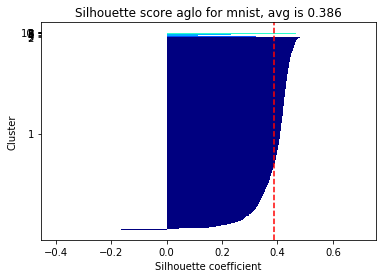

In [286]:
algo_mn=AgglomerativeClustering(n_clusters=10,affinity="euclidean",linkage='complete')
y_agl_mn=algo_mn.fit_predict(X_mn)

cluster_labels=np.unique(y_agl_mn)
n_cluster=cluster_labels.shape[0]
sil_vals=silhouette_samples(X_mn,y_agl_mn,metric='euclidean')
y_ax_lower,y_ax_upper= 0, 0
yticks=[]
for i,c in enumerate(cluster_labels):
    sil_v=sil_vals[y_agl_mn==c]
    sil_v.sort()
    y_ax_upper+=len(sil_v)
    color=cm.jet(float(i)/n_cluster)
    plt.barh(range(y_ax_lower,y_ax_upper),sil_v,height=1.0,color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(sil_v)

sil_average=np.mean(sil_vals)
plt.axvline(sil_average,ymin=0,ymax=y_ax_upper,color='red',linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette score aglo for mnist, avg is %.3f' % sil_average)
plt.show()


# Use true labels to verify the performance of our classifiers
Using the majority voting technique, we assign a prediction labes to our clusterd data for each of our model and check it against the true data labels. W obtain very intersiting results that we sum up as follows:
## The iris data:
accuracy of iris clustering using kmeans++ is : 0.833
accuracy of iris clustering using density based algo is : 0.667
accuracy of iris clustering using agglomerative clustering is : 0.840

We see that our kmeans++ and agglomerative models do decent job clustering our data
It however perform worse for our DBSCAN which was expected given that our model was only able to split our data into 2 clusters

## The mnist Data
accuracy of mnist clustering using kmeans++ is : 0.620
accuracy of mnist clustering using aglomerative is : 0.117

even though our silhouette avg score was very low, kmeans++ does a decent job clustering our data (62% accuracy).Given the complexity of our dataset, We consider this score to be good enough

Unfortunately, we cannot say the same thing about the agglomerative model which result in a very low accuracy score: 0.117
This was somewhat expected given that the silhouette plot shows a very low bincount for most of our digits.


In [332]:
#a little supervision: determining the accuracy of all algorithms
#we used kmeans++, DBclustering and agglomerative for both iris and mnist
y_agl_ir=algo_ir.fit_predict(X_ir)
y_kmir=km_ir.fit_predict(X_ir)
y_db=db.fit_predict(X_ir)
#print(np.bincount(y_agl_ir))
#we begin by accuracy of iris for km
for i in range(len(np.unique(y_kmir))):
    y_kmir[y_kmir==i]=np.argmax(np.bincount(y_ir[y_kmir==i]))+3
    
for c in range(len(y_ir)):
    y_kmir[c]+=-3
print("accuracy of iris clustering using kmeans++ is : %.3f" % np.mean(y_ir==y_kmir) )

#density based accuracy for iris
for i in range(len(np.unique(y_db))):
    y_db[y_db==i]=np.argmax(np.bincount(y_ir[y_db==i]))+3
    
for c in range(len(y_ir)):
    y_db[c]+=-3
print("accuracy of iris clustering using density based algo is : %.3f" % np.mean(y_ir==y_db) )

#density for aglomerative clustering
for i in range(len(np.unique(y_agl_ir))):
     
     if i == 1:
        y_agl_ir[y_agl_ir==i] = 5
        
     else:
        y_agl_ir[y_agl_ir==i]=np.argmax(np.bincount(y_ir[y_agl_ir==i]))+3
        

for l in range(len(y_ir)):
    y_agl_ir[l]+=-3
print("accuracy of iris clustering using aglomerative clustering is : %.3f" % np.mean(y_ir==y_agl_ir) )


accuracy of iris clustering using kmeans++ is : 0.833
accuracy of iris clustering using density based algo is : 0.667
accuracy of iris clustering using aglomerative clustering is : 0.840


In [333]:
#we do the same thing for the mnist dataset
#kmeans++
y_kmn=km_mn.fit_predict(X_mn)
y_agl_mn=algo_mn.fit_predict(X_mn)
#we begin by accuracy of iris for km
for i in range(len(np.unique(y_kmn))):
    y_kmn[y_kmn==i]=np.argmax(np.bincount(y_mn[y_kmn==i]))+10

for c in range(len(y_mn)):
    y_kmn[c]+=-10
print("accuracy of mnist clustering using kmeans++ is : %.3f" % np.mean(y_mn==y_kmn) )

#aglomerative clustering
for i in range(len(np.unique(y_agl_mn))):
    y_agl_mn[y_agl_mn==i]=np.argmax(np.bincount(y_mn[y_agl_mn==i]))+10

for c in range(len(y_mn)):
    y_agl_mn[c]+=-10
print("accuracy of mnist clustering using aglomerative is : %.3f" % np.mean(y_mn==y_agl_mn) )


accuracy of mnist clustering using kmeans++ is : 0.620
accuracy of mnist clustering using aglomerative is : 0.117


# Conclusion:

This project analyzed 2 different datasets and tried to fit clustering classifiers to attempt to group similar points together.
We comapred different models using tools such as accuracy scores and silhouette scores.
Although we obtained decent results especially for the iris data, it is worth mentionning that there is a lot more clustering techniques that could lead to better results especially for the mnist data.
The current results could also be improved by determining the optimal hypermeters. This could be done using tools such as Gridsearch.